### Instalation Jupyter Notebook :
https://www.youtube.com/watch?v=UTqOXwAi1pE

# Simple Linear Regression 

In this example we will consider Ice Cream Profits based on 'Temperature'. 

In this notebook, we'll build a linear regression model to predict 'Ice Cream Profits' using 'Temperature' as the predictor variable.


In [ ]:
Langkah-Langkah dalam Analisis Regresi

Mengimport data

Mengenali data

Melakukan analisis secara statistik 

Melakukan eksploratori data

Memasuki machine learning modeling dengan regresi linear

Evaluasi machine learning model 

Mencari insight



## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
import pandas as pd

In [5]:
# Reading csv file from github repo
#url  = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
iceCreamSales = pd.read_csv('C:/Users/Asus/Documents/Belajar_Data_Science/Project Data Science/archive/temperatures.csv')
iceCreamSales

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


Now, let's check the structure of the advertising dataset.

In [7]:
# Display the first 5 rows
iceCreamSales.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [9]:
# Display the last 5 rows
iceCreamSales.tail()

,Temperature,Ice Cream Profits
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91
364,101,85.02


In [11]:
# Let's check the columns
iceCreamSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [13]:
# Check the shape of the DataFrame (rows, columns)
iceCreamSales.shape

(365, 2)

In [15]:
iceCreamSales.columns

Index(['Temperature', 'Ice Cream Profits'], dtype='object')

In [17]:
# Let's look at some statistical information about the dataframe.
iceCreamSales.describe()

,Temperature,Ice Cream Profits
count,365.000000,365.000000
mean,71.980822,52.103616
std,13.258510,15.989004
min,39.000000,11.880000
25%,63.000000,40.650000
50%,73.000000,53.620000
75%,82.000000,63.630000
max,101.000000,89.290000


In [19]:
iceCreamSales['Ice Cream Profits'].describe()

count    365.000000
mean      52.103616
std       15.989004
min       11.880000
25%       40.650000
50%       53.620000
75%       63.630000
max       89.290000
Name: Ice Cream Profits, dtype: float64

In [21]:
for column in iceCreamSales.columns:
    print(f"============= {column} =================")
    display(iceCreamSales[column].value_counts())
    print()

============= Temperature =================


Temperature
77    15
66    14
84    13
68    12
74    12
      ..
42     1
97     1
98     1
41     1
39     1
Name: count, Length: 62, dtype: int64


============= Ice Cream Profits =================


Ice Cream Profits
49.60    2
61.82    2
59.69    2
68.28    2
67.58    2
        ..
45.07    1
44.98    1
47.52    1
44.48    1
85.02    1
Name: count, Length: 352, dtype: int64

In [25]:
total = iceCreamSales.isnull().sum().sort_values(ascending=False)
percent = (iceCreamSales.isnull().sum()/iceCreamSales.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Temperature,0,0.0
Ice Cream Profits,0,0.0


In [27]:
iceCreamSales.isna().sum()

Temperature          0
Ice Cream Profits    0
dtype: int64

In [29]:
len(iceCreamSales)

365

In [31]:
iceCreamSales[iceCreamSales[['Temperature', 'Ice Cream Profits']].duplicated()]

,Temperature,Ice Cream Profits
227,77,56.33


In [33]:
dfIceCreamSales = iceCreamSales.drop(iceCreamSales[iceCreamSales[['Temperature', 'Ice Cream Profits']].duplicated()].index).reset_index(drop=True)

In [35]:
dfIceCreamSales[dfIceCreamSales[['Temperature', 'Ice Cream Profits']].duplicated()]

,Temperature,Ice Cream Profits


In [37]:
dfIceCreamSales

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
359,99,85.13
360,99,87.08
361,99,89.29
362,101,81.91


In [39]:
dfIceCreamSales['Temperature'].unique()

array([ 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101], dtype=int64)

In [41]:
dfIceCreamSales['Temperature'].is_unique

False

In [43]:
dfIceCreamSales['Ice Cream Profits'].unique()

array([13.17, 11.88, 18.82, 18.65, 17.02, 15.88, 19.07, 19.57, 21.62,
       22.34, 19.23, 21.25, 19.81, 22.12, 24.22, 24.68, 23.78, 26.41,
       25.01, 22.29, 27.81, 23.54, 22.89, 25.68, 27.29, 27.64, 27.31,
       21.93, 32.18, 30.67, 28.05, 28.82, 27.87, 29.39, 32.6 , 31.62,
       25.71, 28.48, 30.09, 33.58, 29.75, 31.94, 33.71, 28.37, 27.41,
       27.99, 30.37, 27.68, 29.53, 33.91, 34.19, 33.22, 34.47, 30.89,
       35.8 , 33.44, 36.79, 31.56, 35.13, 36.11, 32.39, 38.18, 29.69,
       38.47, 37.74, 36.71, 32.29, 37.5 , 35.33, 35.06, 36.25, 40.25,
       39.69, 40.95, 37.96, 38.1 , 38.21, 37.3 , 39.53, 37.42, 39.42,
       38.16, 37.66, 39.04, 41.44, 40.19, 37.93, 50.17, 44.15, 41.58,
       40.59, 39.17, 40.57, 40.28, 41.21, 44.85, 40.94, 40.14, 38.57,
       44.07, 44.1 , 47.36, 45.38, 41.09, 43.78, 42.72, 42.1 , 43.28,
       44.31, 42.71, 43.03, 42.16, 46.74, 47.68, 44.48, 47.52, 44.98,
       45.07, 45.42, 48.26, 51.75, 45.05, 40.65, 48.65, 45.26, 46.04,
       42.94, 50.62,

In [45]:
dfIceCreamSales['Ice Cream Profits'].is_unique

False

# Visualising Data Using Plot

<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

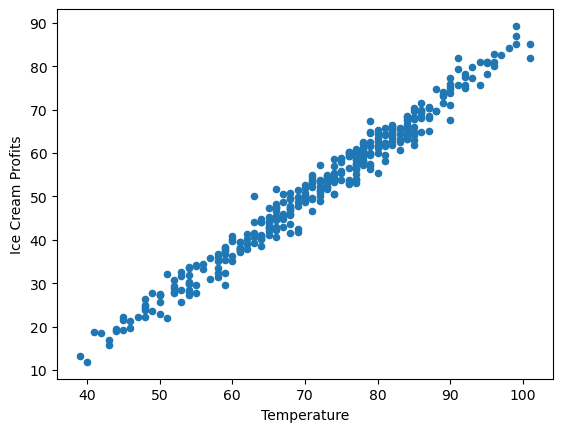

In [158]:
# Visualise the relationship between the features and the response using scatterplots
dfIceCreamSales.plot(x='Temperature',y='Ice Cream Profits',kind='scatter')

In [160]:
# Putting feature variable to temp
temp = dfIceCreamSales['Temperature']

# Print the first 5 rows
temp

0       39
1       40
2       41
3       42
4       43
      ... 
359     99
360     99
361     99
362    101
363    101
Name: Temperature, Length: 364, dtype: int64

In [162]:
# Convert dari Fahrenheit ke Celcius
XCelcius = (temp-32)*5/9
tempCel = XCelcius.astype(int)
tempCel

0       3
1       4
2       5
3       5
4       6
       ..
359    37
360    37
361    37
362    38
363    38
Name: Temperature, Length: 364, dtype: int32

In [164]:
import numpy as np
from sklearn import preprocessing

preprocessor = preprocessing.MinMaxScaler(feature_range=(0, 1))
#preprocessor.fit(dfIceCreamSales)
#scaled_data = preprocessor.transform(sample_data)
#scaled_data

scaled_IceCreamSales = preprocessor.fit_transform(dfIceCreamSales) # fit dan transform sekaligus
scaled_IceCreamSales

array([[0.        , 0.01666451],
       [0.01612903, 0.        ],
       [0.03225806, 0.0896525 ],
       [0.0483871 , 0.0874564 ],
       [0.06451613, 0.06639969],
       [0.06451613, 0.05167291],
       [0.08064516, 0.09288206],
       [0.08064516, 0.09934117],
       [0.09677419, 0.12582354],
       [0.09677419, 0.13512466],
       [0.09677419, 0.09494897],
       [0.11290323, 0.12104379],
       [0.11290323, 0.10244155],
       [0.12903226, 0.13228265],
       [0.14516129, 0.15941093],
       [0.14516129, 0.16535331],
       [0.14516129, 0.15372691],
       [0.14516129, 0.18770185],
       [0.14516129, 0.16961633],
       [0.14516129, 0.13447875],
       [0.16129032, 0.20578737],
       [0.16129032, 0.15062653],
       [0.17741935, 0.14222969],
       [0.17741935, 0.17827154],
       [0.17741935, 0.19906989],
       [0.17741935, 0.20359127],
       [0.17741935, 0.19932825],
       [0.19354839, 0.12982819],
       [0.19354839, 0.26224002],
       [0.20967742, 0.2427335 ],
       [0.

In [166]:
scaled_dfIceCreamSales = pd.DataFrame(scaled_IceCreamSales, columns=dfIceCreamSales.columns)
scaled_dfIceCreamSales.describe()

,Temperature,Ice Cream Profits
count,364.000000,364.000000
mean,0.531726,0.519468
std,0.214099,0.206814
min,0.000000,0.000000
25%,0.387097,0.371464
50%,0.548387,0.539013
75%,0.693548,0.669778
max,1.000000,1.000000


<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

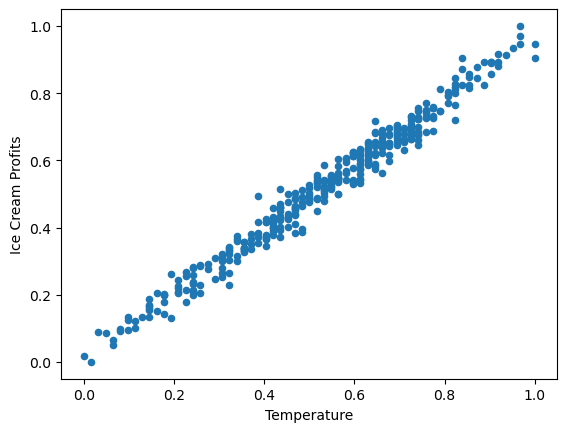

In [168]:
# Visualise the relationship between the features and the response using scatterplots
scaled_dfIceCreamSales.plot(x='Temperature',y='Ice Cream Profits',kind='scatter')

C:\Users\Asus\AppData\Local\Temp\ipykernel_11284\1242525084.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfIceCreamSales['Temperature'], ax=ax[0])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\AppData\Local\Temp\ipykernel_11284\1242525084.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function

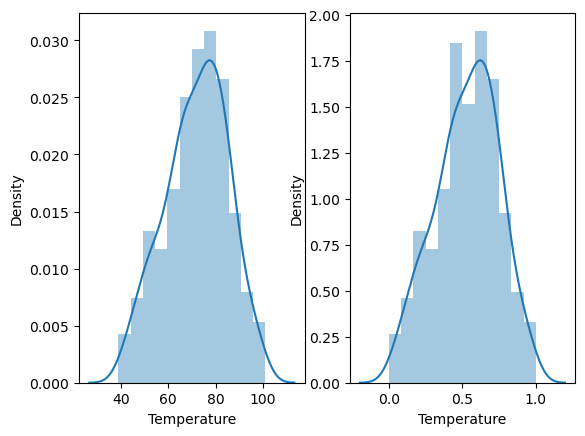

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(ncols=2)
sns.distplot(dfIceCreamSales['Temperature'], ax=ax[0])
sns.distplot(scaled_dfIceCreamSales['Temperature'], ax=ax[1])
plt.show()

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [172]:
# Putting feature variable to X
X = scaled_dfIceCreamSales['Temperature']

# Print the first 5 rows
X

0      0.000000
1      0.016129
2      0.032258
3      0.048387
4      0.064516
         ...   
359    0.967742
360    0.967742
361    0.967742
362    1.000000
363    1.000000
Name: Temperature, Length: 364, dtype: float64

In [174]:
# Putting response variable to y
y = scaled_dfIceCreamSales['Ice Cream Profits']

# Print the first 5 rows
y.head()

0    0.016665
1    0.000000
2    0.089652
3    0.087456
4    0.066400
Name: Ice Cream Profits, dtype: float64

## Splitting Data into Training and Testing Sets

In [176]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [178]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(254,)
(254,)
(110,)
(110,)


In [180]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'Temperature'.

import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [182]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(254, 1)
(254,)
(110, 1)
(110,)


## Performing Linear Regression

In [184]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Coefficients Calculation

In [186]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

0.011650470366092569
[0.95418297]


$y = 0.011 + 0.954 \times Temperatures $<br>  y = c + m1 x Temperatures

Now, let's use this equation to predict our sales.

## Predictions

In [188]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [190]:
type(y_pred)

numpy.ndarray

#### Computing RMSE and R^2 Values
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model


In [192]:
y_test.shape # cheek the shape to generate the index for plot

(110,)

Text(0, 0.5, 'Ice Cream Profits')

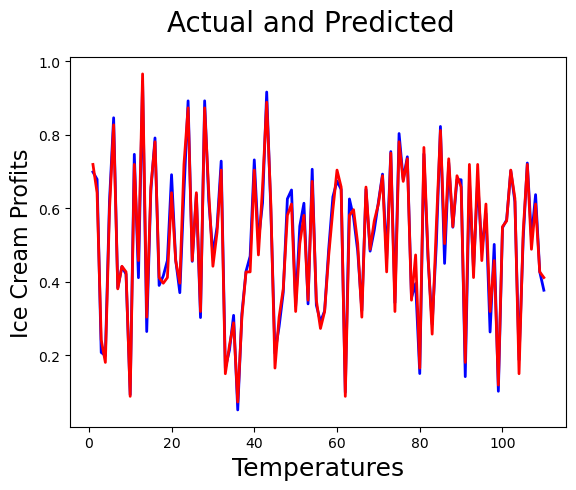

In [194]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,111,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Temperatures', fontsize=18)                               # X-label
plt.ylabel('Ice Cream Profits', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

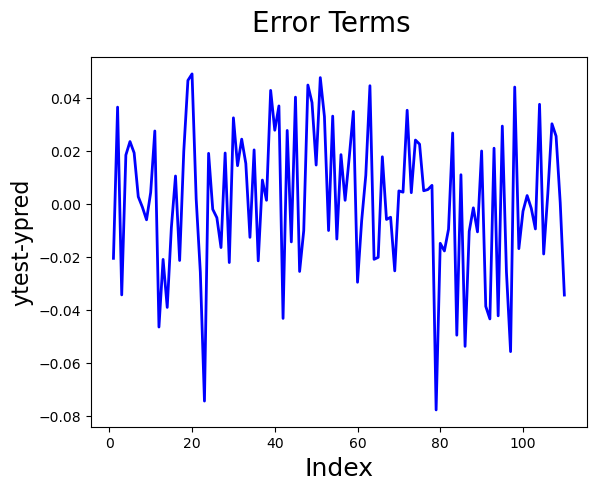

In [196]:
# Error terms
c = [i for i in range(1,111,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [198]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [200]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
#Catatan : MSE error yang bagus itu dibawah 10 %

In [202]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0007557429201176046
r_square_value : 0.981246861301204


In [204]:
# this mse =0.0007 means that this model is not able to match the 0.07% percent of the values
# r2 means that your model is 98% is accurate on test data .

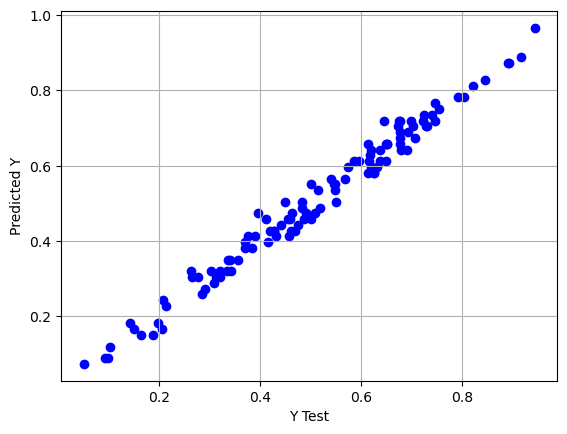

In [206]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()


Catatan : selisih antara train dengan test juga maks di 10% baik di evaluasi matrix regresi ataupun klasifikasi..
tapi nanti sambil dicek juga di label target nya make describe() buat liat rentang nilai maks dan min
df['target'].describe()  , target disitu nama kolom targetnya..
misal min 5, maks 100, RMSE kita 3 maka bagus banget (semakin mendekati nilai minimum atau dibawah itu maka bagus) tapi kalo semakin deket ke nilai maks atau lebih maka modellnya jelek